IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

EXPLORANDO NOSSO DATASET COM PANDAS 

In [73]:
df_simple = pd.read_csv('dataset.csv')

In [41]:
#df_simple

Construção do primeiro modelo, não foi escolhido no final

In [62]:
#X = pd.get_dummies(df_simple.drop('Producao_Total_Toneladas', axis=1))  # features
#y = df_simple['Producao_Total_Toneladas']  #target

In [63]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
#iniciando o primeiro modelo escolhido
#modelo_regressor = DecisionTreeRegressor(random_state=42)

# treinamento
#modelo_regressor.fit(X_train, y_train)

#previsao teste
#y_pred = modelo_regressor.predict(X_test)

#avaliacao de performance
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#print(f'Mean Squared Error (MSE): {mse}')
#print(f'R² (coeficiente de determinação): {r2}')

# salvando...
#with open('models/model_DTR.sav', 'wb') as model_file:
#    pickle.dump(modelo_regressor, model_file)


Mean Squared Error (MSE): 600.6130999999999
R² (coeficiente de determinação): 0.9507208173315604


MODELO ESCOLHIDO PELO DESEMPENHO: RANDOM FOREST PARA REGRESSAO 

Como nosso dataset continua sendo o mesmo, reutilizamos as análises exploratórias e o df gerado

In [65]:
df_simple = pd.read_csv('dataset.csv')

In [66]:
df_simple

,Cultura,Quantidade_a_ser_Plantada_Toneladas,Producao_Total_Toneladas,Tipo_de_Solo,Tipo_de_Irrigacao,Frequencia_Irrigacao,Temperatura_Media,Fertilizante,Pragas,Rotacao_de_Culturas,Tecnologia_Utilizada
0,Café,52,213.2,Argila,Sulcos,Mensal,31,Nitrogênio,Fungos,Não,Alto
1,Café,93,288.3,Silte,Sulcos,Semanal,25,Composto,Fungos,Sim,Baixo
2,Soja,15,52.5,Argila,Sulcos,Semanal,29,Composto,Ferrugem,Não,Baixo
3,Arroz,72,252.0,Silte,Sulcos,Mensal,25,Orgânico,Insetos,Não,Alto
4,Milho,61,231.8,Areia,Sulcos,Diária,30,Composto,Insetos,Não,Baixo
...,...,...,...,...,...,...,...,...,...,...,...
495,Café,93,316.2,Argila,Gotejamento,Mensal,24,Nitrogênio,Ferrugem,Não,Alto
496,Soja,67,294.8,Silte,Sulcos,Mensal,34,Orgânico,Insetos,Não,Alto
497,Arroz,76,212.8,Areia,Aspersão,Mensal,23,Composto,Fungos,Sim,Baixo
498,Milho,26,109.2,Silte,Gotejamento,Diária,32,Fósforo,Fungos,Não,Médio


Treinamento do modelo escolhido

In [83]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#features e nosso target
X = df_simple.drop('Producao_Total_Toneladas', axis=1)
y = df_simple['Producao_Total_Toneladas']

#codificando com pandas
X_encoded = pd.get_dummies(X)

#separamos para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#o modelo RandomForestRegressor foi um teste, porem apresentou melhor resultados 
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"Resultados com os dados de treino -> MSE: {mse_train}, RMSE: {rmse_train}, R²: {r2_train}")
print(f"Resultados com os dados de teste -> MSE: {mse_test}, RMSE: {rmse_test}, R²: {r2_test}")


Resultados com os dados de treino -> MSE: 37.45936513249986, RMSE: 6.1204056346372875, R²: 0.9970862872665672
Resultados com os dados de teste -> MSE: 345.85248520999994, RMSE: 18.59710959289104, R²: 0.9716234497799042


Gráfico de dispersão com matplotlib para comparação de valores reais X  valores previstos pelo modelo

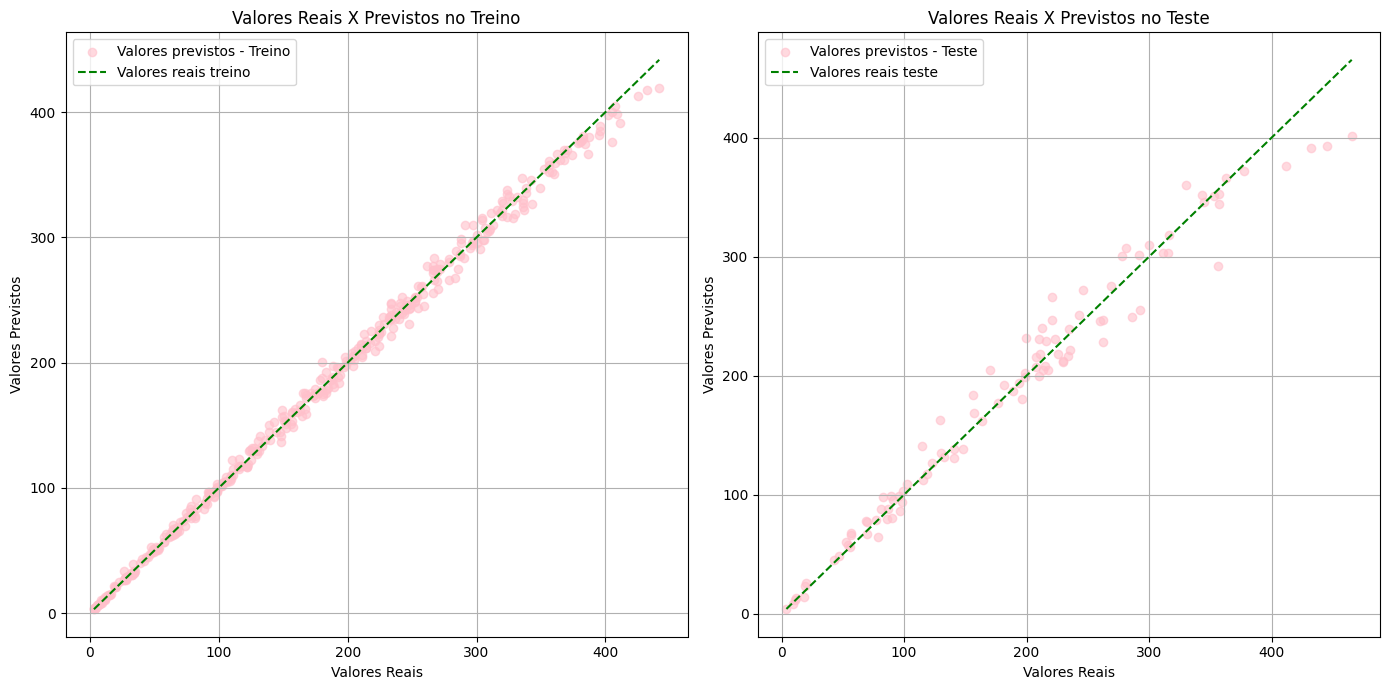

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)  #treino
plt.scatter(y_train, y_train_pred, color='pink', label='Valores previstos - Treino', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='green', linestyle='--', label='Valores reais treino')
plt.title('Valores Reais X Previstos no Treino')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.grid(True)





plt.subplot(1, 2, 2)  #teste
plt.scatter(y_test, y_test_pred, color='pink', label='Valores previstos - Teste', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', label='Valores reais teste')
plt.title('Valores Reais X Previstos no Teste')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


In [ ]:
#import pickle
#with open(r'models/random_forest_regressor_model.sav', 'wb') as model_file:
#    pickle.dump(rf_model, model_file)


In [85]:
import pickle

modelo = pickle.load(open(r'models\random_forest_regressor_model.sav', 'rb'))

#listando features usadas no treino
features_usadas_no_treino = modelo.feature_names_in_
print("Features esperadas pelo modelo:", features_usadas_no_treino)


Features esperadas pelo modelo: ['Quantidade_a_ser_Plantada_Toneladas' 'Temperatura_Media' 'Cultura_Arroz'
 'Cultura_Café' 'Cultura_Milho' 'Cultura_Soja' 'Cultura_Trigo'
 'Tipo_de_Solo_Areia' 'Tipo_de_Solo_Argila' 'Tipo_de_Solo_Silte'
 'Tipo_de_Irrigacao_Aspersão' 'Tipo_de_Irrigacao_Gotejamento'
 'Tipo_de_Irrigacao_Sulcos' 'Frequencia_Irrigacao_Diária'
 'Frequencia_Irrigacao_Mensal' 'Frequencia_Irrigacao_Semanal'
 'Fertilizante_Composto' 'Fertilizante_Fósforo' 'Fertilizante_Nitrogênio'
 'Fertilizante_Orgânico' 'Pragas_Ferrugem' 'Pragas_Fungos'
 'Pragas_Insetos' 'Pragas_Nenhuma' 'Rotacao_de_Culturas_Não'
 'Rotacao_de_Culturas_Sim' 'Tecnologia_Utilizada_Alto'
 'Tecnologia_Utilizada_Baixo' 'Tecnologia_Utilizada_Médio']


A PARTIR DAQUI, ESTAMOS MEDINDO NOSSOS PRÓXIMOS PASSOS, POIS PERCEBEMOS A NECESSIDADE DE AUMENTAR AINDA MAIS O DATASET COM BASE EM DADOS REAIS QUANDO USAMOS O DECISION TREE PARA REGRESSAO...MAS POR RANDOM FOREST JA FOI MAIS SATISFATORIO

In [78]:
# from sklearn.model_selection import cross_val_score
# import numpy as np
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import make_pipeline

# import pickle
# modelo = pickle.load(open(r'C:models/model_DTR.sav', 'rb'))

# import pandas as pd
# data = pd.read_csv('dataset.csv')


# X = data.drop(columns=['Producao_Total_Toneladas'])  
# y = data['Producao_Total_Toneladas']  

# #  colunas categóricas
# categorical_cols = X.select_dtypes(include=['object']).columns

# # definindo  o pré-processador para transformar variáveis categóricas em one-hot encoding
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(), categorical_cols)
#     ], remainder='passthrough')

# pipeline = make_pipeline(preprocessor, modelo)

# # validação cruzada com 5 divisões
# scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# # erro médio no conjunto de validação
# print(f"Erro médio na validação cruzada: {-np.mean(scores)}")

# # treinar o modelo com o pipeline nos dados de treino
# pipeline.fit(X, y)

# # previsao treino
# pred_train = pipeline.predict(X)

# #calcular o MSE no conjunto de treino
# mse_train = mean_squared_error(y, pred_train)
# print(f"Erro no conjunto de treino: {mse_train}")


Erro médio na validação cruzada: 711.6738399999998
Erro no conjunto de treino: 1.2116903504194742e-30
